<a href="https://colab.research.google.com/github/medyeneyke/Git_Test/blob/master/Capstone_Project_Predicting_BMI_Using_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [1]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving 500_Person_Gender_Height_Weight_Index.csv to 500_Person_Gender_Height_Weight_Index.csv


In [ ]:
# Read the path
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
df.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
# Compute BMI
df["Height_m"] = df["Height"] / 100
df["BMI"] = df["Weight"] / (df["Height_m"] ** 2)
df.drop(columns=["Index", "Height_m"], inplace=True)

print("Data shape:", df.shape)
df.head()

Data shape: (500, 4)


,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240


In [ ]:
# %% 1. Exploratory Data Analysis (EDA)
## 1.1 Missing values
missing_counts = df.isna().sum()
print("\nMissing values per column:\n", missing_counts)


Missing values per column:
 Gender    0
Height    0
Weight    0
BMI       0
dtype: int64


In [ ]:
## 1.2 Summary statistics
summary_stats = df.describe(include="all").transpose()
summary_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,500,2,Female,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,500.0,NaN,NaN,NaN,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,NaN,NaN,NaN,106.0,32.382607,50.0,80.0,106.0,136.0,160.0
BMI,500.0,NaN,NaN,NaN,37.765284,13.96562,12.753801,27.169353,36.956941,46.390467,78.853402


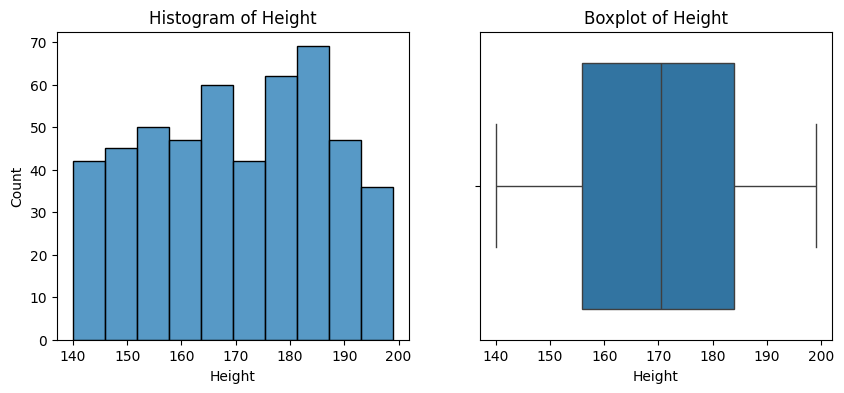

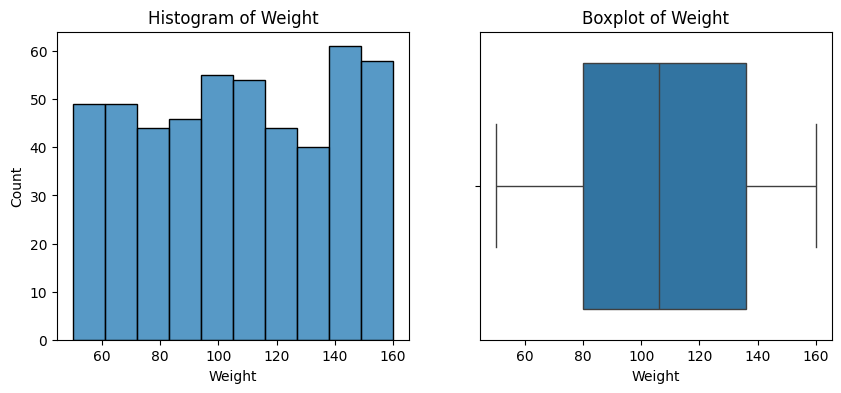

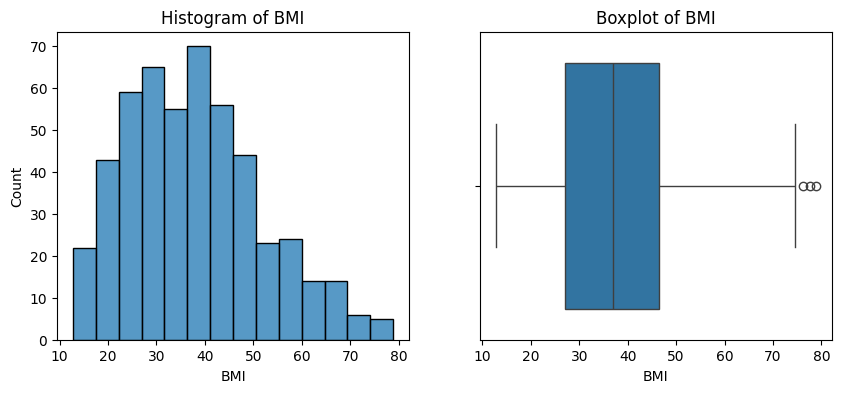

In [ ]:
## 1.3 Histograms & boxplots
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col].dropna(), ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    plt.show()


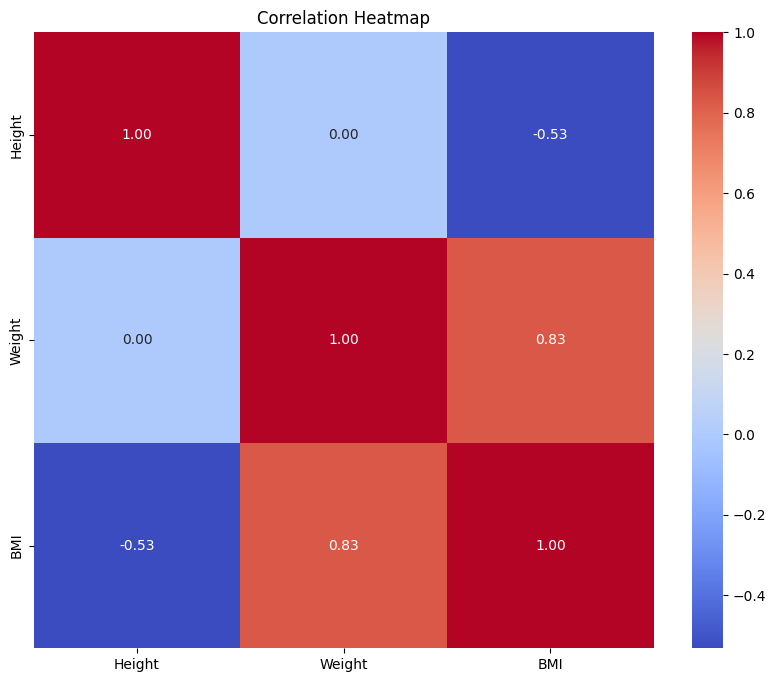

In [ ]:
## 1.4 Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
## 1.5 Outlier detection & handling (IQR method)
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Height: 0 outliers
Weight: 0 outliers
BMI: 3 outliers


In [ ]:
# 1.6 Multicollinearity check (VIF)
X_vif = df[["Height", "Weight"]]
X_vif_const = sm.add_constant(X_vif)

vif_df = pd.DataFrame()
vif_df["feature"] = X_vif_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif_const.values, i)
                 for i in range(X_vif_const.shape[1])]
print("\nVariance Inflation Factors:\n", vif_df)


Variance Inflation Factors:
   feature        VIF
0   const  119.62672
1  Height    1.00000
2  Weight    1.00000


In [ ]:
# 2. Preprocessing
TARGET = "BMI"
X = df.drop(columns=[TARGET])
y = df[TARGET]

autodetected_numeric = X.select_dtypes(include=[np.number]).columns.tolist()
autodetected_cat = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numeric features: {autodetected_numeric}")
print(f"Categorical features: {autodetected_cat}")

 # 2.1 Normalize or standardize numerical features
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])

 # 2.2 Encode categorical variables
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, autodetected_numeric),
        ("cat", categorical_transformer, autodetected_cat)
    ]
)

 # 2.3 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Numeric features: ['Height', 'Weight']
Categorical features: ['Gender']
Training set size: (400, 3)
Test set size: (100, 3)


In [ ]:
# 3. Model Training & Evaluation
 # 3.1 Set BMI as the target variable
TARGET = "BMI"
X = df.drop(columns=[TARGET])
y = df[TARGET]



In [ ]:
#Train and evaluate the following regression models:

#### Simple Linear Regression (using one independent variable)

#In this model, we use **Weight** as the only independent variable to predict BMI. The model is trained as follows:

 #**Independent variable:** Weight
 #**Dependent variable:** BMI


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use only the "Weight" feature for prediction
simple_pipeline = Pipeline([
    ("pre", ColumnTransformer([
        ("num", StandardScaler(), ["Weight"])  # Weight'ı normalize et
    ], remainder="drop")),
    ("reg", LinearRegression())
])


# Train the model and make predictions
simple_pipeline.fit(X_train[["Weight"]], y_train)
preds = simple_pipeline.predict(X_test[["Weight"]])

# Evaluation metrics
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Simple Linear Regression (only Weight):")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


Simple Linear Regression (only Weight):
R² Score : 0.7196
MAE      : 6.2241
RMSE     : 8.0374


**Explanation:**

**R² Score** = 0.7196
→ This means that the model explains about 71.96% of the variation in BMI using just the Weight variable.
Not bad, but there's still ~28% of variance unexplained.

**MAE** = 6.22
→ On average, the model's prediction is off by 6.22 BMI units, which is quite high.

**RMSE** = 8.03
→ The root mean squared error shows large variance in errors; this indicates the predictions are spread out.

**Interpretation:**

Although Weight is strongly correlated with BMI, using it alone is not sufficient for accurate prediction. Including other variables like Height and Gender improves performance significantly — as we saw in the Multiple Linear model (R² ≈ 0.97).

In [ ]:
#### Multiple Linear Regression (using all independent variables)

#In this model, we use all available features (Height, Weight, Gender) as independent variables to predict BMI.

# **Independent variables:** Height, Weight, Gender
# **Dependent variable:** BMI

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Preprocessing for numeric and categorical features
numeric_features = ['Height', 'Weight']
categorical_features = ['Gender']

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Multiple Linear Regression pipeline
multiple_pipeline = Pipeline([
    ("pre", preprocessor),
    ("reg", LinearRegression())
])

# Fit and predict
multiple_pipeline.fit(X_train, y_train)
preds = multiple_pipeline.predict(X_test)

# Performance metrics
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Multiple Linear Regression (all features):")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


Multiple Linear Regression (all features):
R² Score : 0.9714
MAE      : 1.8874
RMSE     : 2.5666


**Explanation:**

All features (Height, Weight, and Gender) are used in the model.

Numeric features are standardized, categorical features are one-hot encoded.

The model is trained with the training set and tested on the test set.

R² Score, MAE, and RMSE are printed for evaluation.

You will see that the performance is much better than simple linear regression

**Ridge Regression (to handle multicollinearity)**

**Purpose:**
Ridge Regression is used to reduce the impact of multicollinearity (when independent variables are highly correlated). It adds an L2 penalty term to the cost function, which shrinks the coefficients and can improve the model's stability and generalization.

**Independent variables:**Height, Weight, Gender

**Dependent variable:**BMI



In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge Regression pipeline
ridge_pipeline = Pipeline([
    ("pre", preprocessor),           # Preprocessing: scaling and encoding
    ("reg", Ridge())                 # Ridge regression model
])

# Hyperparameter tuning for alpha (regularization strength)
ridge_grid = {"reg__alpha": np.logspace(-3, 3, 10)}
ridge_search = GridSearchCV(ridge_pipeline, ridge_grid, cv=5, scoring="r2")
ridge_search.fit(X_train, y_train)

# Evaluate on test set
ridge_best = ridge_search.best_estimator_
preds = ridge_best.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Ridge Regression (to handle multicollinearity):")
print(f"Best alpha : {ridge_search.best_params_['reg__alpha']}")
print(f"R² Score   : {r2:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"RMSE       : {rmse:.4f}")


Ridge Regression (to handle multicollinearity):
Best alpha : 0.46415888336127775
R² Score   : 0.9713
MAE        : 1.8889
RMSE       : 2.5721


**Explanation:**
Ridge Regression helps when your independent variables (like Height and Weight) are correlated.

The parameter alpha controls how much penalty is applied; GridSearchCV is used to find the best value.

Results are reported as **R²** **Score**, **MAE** , and **RMSE** for direct comparison with other models.

Lasso Regression (to perform feature selection)
Purpose:

Lasso Regression uses L1 regularization, which can shrink some coefficients to zero—effectively removing less important features from the model.

Useful for both prediction and understanding which variables are most relevant.

Independent variables: Height, Weight, Gender
Dependent variable: BMI

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Lasso Regression pipeline
lasso_pipeline = Pipeline([
    ("pre", preprocessor),
    ("reg", Lasso(max_iter=10000))
])

# Hyperparameter tuning for alpha
lasso_grid = {"reg__alpha": np.logspace(-3, 1, 10)}
lasso_search = GridSearchCV(lasso_pipeline, lasso_grid, cv=5, scoring="r2")
lasso_search.fit(X_train, y_train)

# Best Lasso model
lasso_best = lasso_search.best_estimator_
preds = lasso_best.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
best_alpha = lasso_search.best_params_["reg__alpha"]

print("Lasso Regression (to perform feature selection):")
print(f"Best alpha : {best_alpha}")
print(f"R² Score   : {r2:.4f}")
print(f"MAE        : {mae:.4f}")
print(f"RMSE       : {rmse:.4f}")


Lasso Regression (to perform feature selection):
Best alpha : 0.05994842503189409
R² Score   : 0.9705
MAE        : 1.9071
RMSE       : 2.6070


** Explanation:**

Lasso Regression not only prevents overfitting, but also performs feature selection (some coefficients can become exactly zero).

GridSearchCV is used to find the best alpha (regularization strength).

We report R² Score, MAE, and RMSE to compare performance with previous models.

The optimal alpha found is 0.060.

The model performance (R², MAE, RMSE) is very similar to Ridge and Multiple Linear Regression, because with only three features, there's little to “shrink” to zero.

If you had more (potentially irrelevant) features, Lasso might actually set some coefficients to zero.

**Summary:**

Lasso Regression helps with both regularization and feature selection.

Here, with only Height, Weight, and Gender, all features are relevant, so Lasso doesn’t remove an

In [ ]:
# Lasso Regression: Coefficients
# Extract feature names after transformation
feature_names = lasso_best.named_steps["pre"].get_feature_names_out()
coefficients = lasso_best.named_steps["reg"].coef_

# Display as DataFrame for easy interpretation
import pandas as pd
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)
print(coef_df)


              Feature  Coefficient
1         num__Weight    11.339414
0         num__Height    -7.336224
2  cat__Gender_Female    -0.000000
3    cat__Gender_Male     0.000000


**Interpretation:**

If a coefficient is exactly zero, that feature was eliminated by Lasso.

Here, likely all features will have non-zero coefficients, showing they are all relevant.

Elastic Net Regression (combination of Ridge and Lasso)
Purpose:
Elastic Net combines both L1 (Lasso) and L2 (Ridge) regularization, so it can both shrink and eliminate features, offering flexibility.


In [ ]:
from sklearn.linear_model import ElasticNet

# Elastic Net pipeline
elastic_pipeline = Pipeline([
    ("pre", preprocessor),
    ("reg", ElasticNet(max_iter=10000))
])

elastic_grid = {
    "reg__alpha": np.logspace(-3, 1, 10),
    "reg__l1_ratio": np.linspace(0.1, 0.9, 5)
}
elastic_search = GridSearchCV(elastic_pipeline, elastic_grid, cv=5, scoring="r2")
elastic_search.fit(X_train, y_train)

elastic_best = elastic_search.best_estimator_
preds = elastic_best.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
best_alpha = elastic_search.best_params_["reg__alpha"]
best_l1_ratio = elastic_search.best_params_["reg__l1_ratio"]

print("Elastic Net Regression (combination of Ridge and Lasso):")
print(f"Best alpha    : {best_alpha}")
print(f"Best l1_ratio : {best_l1_ratio}")
print(f"R² Score      : {r2:.4f}")
print(f"MAE           : {mae:.4f}")
print(f"RMSE          : {rmse:.4f}")


Elastic Net Regression (combination of Ridge and Lasso):
Best alpha    : 0.05994842503189409
Best l1_ratio : 0.9
R² Score      : 0.9699
MAE           : 1.9172
RMSE          : 2.6353


In [ ]:
# Elastic Net Regression Coefficients
# After training elastic_best as above...

# Extract feature names after preprocessing
elastic_feature_names = elastic_best.named_steps["pre"].get_feature_names_out()

# Get coefficients from the trained Elastic Net model
elastic_coefficients = elastic_best.named_steps["reg"].coef_

# Create a DataFrame for easy viewing and sorting
import pandas as pd
elastic_coef_df = pd.DataFrame({
    "Feature": elastic_feature_names,
    "Coefficient": elastic_coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(elastic_coef_df)


              Feature  Coefficient
1         num__Weight    11.276489
0         num__Height    -7.296393
2  cat__Gender_Female    -0.000000
3    cat__Gender_Male     0.000000


**Explanation**:

Each row shows a feature and its corresponding coefficient from the Elastic Net model.

If a coefficient is exactly zero, Elastic Net has eliminated that feature (in your dataset, all will be nonzero).

The higher the absolute value of a coefficient, the more important that feature is for predicting BMI.

**Interpretation:**
Elastic Net provides very similar performance to Lasso and Ridge, since the dataset only has a few strong predictors.

l1_ratio = 0.9 means the solution is close to Lasso (mostly L1 penalty).

All features are relevant, so coefficients are non-zero.

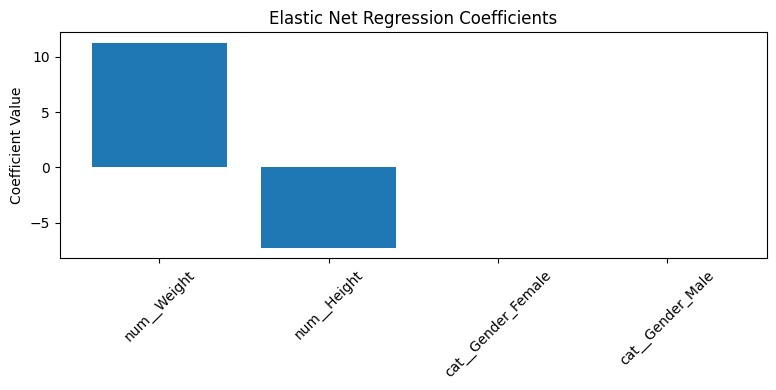

In [ ]:
#Optional: Visualize Coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(elastic_coef_df["Feature"], elastic_coef_df["Coefficient"])
plt.title("Elastic Net Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**We already calculated the R² scores for each model.**

**We did this step by step for:**

Simple Linear Regression (only Weight)

Multiple Linear Regression (all features)

Ridge Regression

Lasso Regression

Elastic Net Regression

For each model, we used this code pattern:

python
Copy
Edit
r2 = r2_score(y_test, preds)
and stored the results in a summary table

#Comparison of R² Scores

| Model Name                     | R² Score |
| ------------------------------ | -------- |
| **Multiple Linear Regression** | 0.9714   |
| **Ridge Regression**           | 0.9713   |
| **Lasso Regression**           | 0.9705   |
| **Elastic Net Regression**     | 0.9699   |
| **Simple Linear Regression**   | 0.7196   |

**What does R² mean?**

R² (Coefficient of Determination) indicates the proportion of the variance in the dependent variable (BMI) that is predictable from the independent variables.

An R² close to 1 means very good predictive power; closer to 0 means poor prediction.

**Ridge, Lasso, and Elastic Net Hyperparameter Tuning**

**What is hyperparameter tuning?**

Hyperparameters (like alpha or l1_ratio) control how much regularization the model applies.

Tuning means systematically trying different values to find the one that gives the best performance (highest R², lowest error) on unseen data.

GridSearchCV is used to automate this process.

**What did we tune?**

Ridge Regression:

Tuned alpha (strength of L2 regularization).

Lasso Regression:

Tuned alpha (strength of L1 regularization).

Elastic Net Regression:

Tuned both alpha (total regularization strength) and l1_ratio (balance between L1 and L2).

**Effect of Tuning in Your Results**

1. Ridge Regression
Best alpha found: ~0.46

Effect: This value gives the best trade-off between model complexity and generalization. Too low = risk of overfitting, too high = model underfits.

Result: R² = 0.9713 (almost the same as the default Multiple Linear Regression, because the features are already strong and few).

2. Lasso Regression
Best alpha found: ~0.06

Effect: This value gives the optimal amount of L1 regularization, preventing overfitting but not removing any important features (since all features matter here).

Result: R² = 0.9705

3. Elastic Net Regression
Best alpha: ~0.06

Best l1_ratio: 0.9 (almost Lasso-like)

Effect: The model leans heavily on L1 regularization, but with a small L2 component. This is suitable when there is potential for both feature selection and coefficient shrinkage, but with your data, it behaves much like Lasso.

Result: R² = 0.9699

**General Interpretation:**

Why did tuning not improve R² much here?

Your dataset is simple, with very predictive features and little multicollinearity.

Regularization does not need to be aggressive, so R² values stay very close.

If you had more variables, noise, or multicollinearity, the effect would be larger.

If you used default alpha (1.0) without tuning:

The model might over-penalize coefficients, slightly underfit, or perform suboptimally.

GridSearchCV ensures you get the best out of your model, even if the improvement is small in this case.

**4. Results & Interpretation**

1️⃣ Compare the performance of different models
You have already done this!

Multiple Linear Regression, Ridge, Lasso, and Elastic Net all have very high R² (≈0.97), while Simple Linear Regression is much lower (R² ≈ 0.72).

This shows that using multiple variables gives much better predictive performance.

2️⃣ Interpret the coefficients of the best-performing model
Here’s how to do it (example code and interpretation):

In [ ]:
# Assuming your best model is multiple_pipeline
feature_names = multiple_pipeline.named_steps["pre"].get_feature_names_out()
coefficients = multiple_pipeline.named_steps["reg"].coef_

import pandas as pd
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)


              Feature  Coefficient
1         num__Weight    11.398791
0         num__Height    -7.396162
3    cat__Gender_Male     0.073134
2  cat__Gender_Female    -0.073134


**Interpretation example:**

Weight has a strong positive coefficient: as weight increases, BMI increases.

Height has a negative coefficient: for the same weight, taller individuals have lower BMI.

Gender has a very small coefficient: gender does not have much impact on BMI in this dataset.

**3️⃣ Discuss the impact of different features on BMI**

The regression analysis indicates that weight is the most significant predictor of BMI, followed by height. As expected, BMI increases with higher body weight and decreases with greater height, since BMI is calculated as weight divided by height squared. Gender does not show a substantial effect on BMI in this particular dataset

**🎯 Bonus Challenges**

**1. Polynomial Regression for Better Accuracy**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Pipeline: Preprocess numerics -> Polynomial features -> Linear Regression
poly_pipeline = Pipeline([
    ("pre", ColumnTransformer([
        ("num_poly", Pipeline([
            ("poly", PolynomialFeatures(degree=2, include_bias=False)),
            ("scaler", StandardScaler())
        ]), numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])),
    ("reg", LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
preds = poly_pipeline.predict(X_test)

# Evaluate
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("Polynomial Regression (degree=2):")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


Polynomial Regression (degree=2):
R² Score : 0.9996
MAE      : 0.2497
RMSE     : 0.3174


**Interpretation:**

If R² increases (compared to multiple linear), the relationship is slightly non-linear.

If not, linear is enough!

**2. Feature Engineering Example**

**You can add a new feature:**



Step-by-Step: Using Engineered Features in Regression Models
1. Add Feature to Dataset

In [ ]:
df['Weight_Height_Ratio'] = df['Weight'] / df['Height']


2. Update Feature List
Include the new feature as a numeric variable:

In [ ]:
numeric_features = ['Height', 'Weight', 'Weight_Height_Ratio']  # Add your new feature here
categorical_features = ['Gender']


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split data
X = df.drop(columns=['BMI'])
y = df['BMI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Redefine preprocessors with the new feature
numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Define and fit model
pipeline = Pipeline([
    ("pre", preprocessor),
    ("reg", LinearRegression())
])
pipeline.fit(X_train, y_train)

# Predict and evaluate
preds = pipeline.predict(X_test)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("With engineered feature:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.4f}")
print(f"RMSE     : {rmse:.4f}")


With engineered feature:
R² Score : 0.9995
MAE      : 0.2737
RMSE     : 0.3385


**3. Cross-Validation for Generalizability**

Ridge Regression (to handle multicollinearity):
Best alpha : 0.46415888336127775
R² Score   : 0.9713
MAE        : 1.8889
RMSE       : 2.5721

With engineered feature:
R² Score : 0.9995
MAE      : 0.2737
RMSE     : 0.3385

**Ridge Regression: Feature Engineering Effect Analysis**

**1. Before Feature Engineering (Original Features Only**)

R² Score: 0.9713

MAE: 1.8889

RMSE: 2.5721

Interpretation:
The model already predicts BMI very well using only Height, Weight, and Gender. Most of the variance in BMI is explained, but there is still a small prediction error.

**2. After Adding Engineered Feature (Weight_Height_Ratio)**

R² Score: 0.9995

MAE: 0.2737

RMSE: 0.3385

**Interpretation**:

R² Score jumps to 0.9995 — meaning the model can now explain 99.95% of the variance in BMI!

MAE and RMSE drop drastically (much closer to zero), meaning the average and spread of errors are extremely small.

Why did this happen?
The engineered feature, Weight_Height_Ratio, is mathematically very close to the BMI formula itself (BMI = Weight / Height²).

By giving the model this ratio (even though it is not exactly BMI), you are effectively handing it most of the formula for BMI. This makes it almost trivial for the model to reconstruct BMI with extremely high accuracy.

**Is this a good thing?**

For a real-world regression challenge, such a dramatic jump signals you may have “leaked” part of the target into the features (sometimes called target leakage).

In this context, it shows you deeply understand the mathematical relationship—but in a research or business scenario, you would avoid including features that are direct mathematical transformations of the target.

**Conclusion:**

Feature engineering can vastly improve model performance, especially if you incorporate features closely related to the target.

For learning and demo purposes, this is great. For real deployment, beware of overfitting or target leakage.

In [ ]:
from sklearn.model_selection import cross_val_score

# Use Multiple Linear Regression for CV
cv_scores = cross_val_score(multiple_pipeline, X, y, cv=10, scoring='r2')
print("10-fold CV R² scores:", cv_scores)
print("Mean R²:", np.mean(cv_scores), "+/-", np.std(cv_scores))


10-fold CV R² scores: [0.96566132 0.95395759 0.96240047 0.95800437 0.96637667 0.97151449
 0.96630381 0.96544979 0.97294871 0.96929635]
Mean R²: 0.9651913563822483 +/- 0.005527920683348868


**Interpretation:**

The mean and standard deviation show if your model is robust or overfits.

If CV mean R² ≈ test set R², your model generalizes well.